In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dask.array as da 
from dask.distributed import Client

In [2]:
df = pd.read_parquet("C:/projects/archive/2019/2019-01.parquet")
df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-01-01 00:46:40.000000,2019-01-01 00:53:20.000000,1.0,1.50,1.0,N,151.0,239.0,1.0,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1.0,2019-01-01 00:59:47.000000,2019-01-01 01:18:59.000000,1.0,2.60,1.0,N,239.0,246.0,1.0,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2.0,2018-12-21 13:48:30.000000,2018-12-21 13:52:40.000000,3.0,0.00,1.0,N,236.0,236.0,1.0,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2.0,2018-11-28 15:52:25.000000,2018-11-28 15:55:45.000000,5.0,0.00,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2.0,2018-11-28 15:56:57.000000,2018-11-28 15:58:33.000000,5.0,0.00,2.0,N,193.0,193.0,2.0,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633666,2.0,2019-01-31 23:57:36.000000,2019-02-01 00:18:39.000000,1.0,4.79,1.0,N,263.0,4.0,1.0,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0
633667,2.0,2019-01-31 23:32:03.000000,2019-01-31 23:33:11.000000,1.0,0.00,1.0,N,193.0,193.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
633668,2.0,2019-01-31 23:36:36.000000,2019-01-31 23:36:40.000000,1.0,0.00,1.0,N,264.0,264.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
633669,2.0,2019-01-31 23:14:53.000000,2019-01-31 23:15:20.000000,1.0,0.00,1.0,N,264.0,7.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7667792 entries, 0 to 633670
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendorid               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   ratecodeid             float64
 6   store_and_fwd_flag     object 
 7   pulocationid           float64
 8   dolocationid           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(15), object(3)
memory usage: 1.1+ GB


In [4]:
df.isna().sum()

vendorid                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
ratecodeid                     0
store_and_fwd_flag             0
pulocationid                   0
dolocationid                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     4855978
dtype: int64

In [21]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
0.0    2811777
2.5         37
Name: count, dtype: int64

In [5]:
df = df.drop('congestion_surcharge', axis= 1)
df.isna().sum()

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Checking for zeros in numeric columns
def check_for_zeros(df):
    for col in df.columns:
        zeros = df[df[col] == 0].shape[0]
        print(f"Zeros in {col}:{zeros}")
        
check_for_zeros(df)

Zeros in vendorid:0
Zeros in tpep_pickup_datetime:0
Zeros in tpep_dropoff_datetime:0
Zeros in passenger_count:117381
Zeros in trip_distance:54770
Zeros in ratecodeid:0
Zeros in store_and_fwd_flag:0
Zeros in pulocationid:0
Zeros in dolocationid:0
Zeros in payment_type:0
Zeros in fare_amount:2426
Zeros in extra:4199855
Zeros in mta_tax:34984
Zeros in tip_amount:2410295
Zeros in tolls_amount:7275166
Zeros in improvement_surcharge:2657
Zeros in total_amount:1414


In [8]:
df = df[df['passenger_count'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['fare_amount'] > 0]
df = df[df['total_amount'] > 0]

check_for_zeros(df)

Zeros in vendorid:0
Zeros in tpep_pickup_datetime:0
Zeros in tpep_dropoff_datetime:0
Zeros in passenger_count:0
Zeros in trip_distance:0
Zeros in ratecodeid:0
Zeros in store_and_fwd_flag:0
Zeros in pulocationid:0
Zeros in dolocationid:0
Zeros in payment_type:0
Zeros in fare_amount:0
Zeros in extra:4092618
Zeros in mta_tax:23830
Zeros in tip_amount:2332245
Zeros in tolls_amount:7108684
Zeros in improvement_surcharge:430
Zeros in total_amount:0


In [9]:
df.describe().map("{:.4f}".format)

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000,7490845.0000
mean,1.6468,1.5929,2.8240,1.0480,165.3922,163.6173,1.2867,12.2705,0.3288,0.4984,1.8214,0.3154,0.3000,15.5388
std,0.5382,1.2195,3.7433,0.4807,66.3181,70.3168,0.4649,228.0075,0.4660,0.0405,2.4274,2.0275,0.0023,228.1491
min,1.0000,1.0000,0.0100,1.0000,1.0000,1.0000,1.0000,0.0100,-60.0000,0.0000,0.0000,0.0000,0.0000,0.3100
25%,1.0000,1.0000,0.9200,1.0000,129.0000,113.0000,1.0000,6.0000,0.0000,0.5000,0.0000,0.0000,0.3000,8.3000
50%,2.0000,1.0000,1.5500,1.0000,162.0000,162.0000,1.0000,9.0000,0.0000,0.5000,1.4500,0.0000,0.3000,11.3000
75%,2.0000,2.0000,2.8300,1.0000,234.0000,234.0000,2.0000,13.5000,0.5000,0.5000,2.3400,0.0000,0.3000,16.5600
max,4.0000,9.0000,831.8000,99.0000,265.0000,265.0000,4.0000,623259.8600,18.5000,60.8000,787.2500,3288.0000,0.6000,623261.6600


In [10]:
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].astype('datetime64[ns]')
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].astype('datetime64[ns]')
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] =df['tpep_pickup_datetime'].dt.day
df['pickup_day_of_week'] =df['tpep_pickup_datetime'].dt.day_of_week 
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df = df.drop(columns= ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7490845 entries, 0 to 633666
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendorid               float64
 1   passenger_count        float64
 2   trip_distance          float64
 3   ratecodeid             float64
 4   store_and_fwd_flag     object 
 5   pulocationid           float64
 6   dolocationid           float64
 7   payment_type           float64
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  duration               float64
 16  pickup_hour            int32  
 17  pickup_day             int32  
 18  pickup_day_of_week     int32  
 19  pickup_month           int32  
dtypes: float64(15), int32(4), object(1)
memory usage: 1.1+ GB


In [12]:
df = df[df['duration'] > 0]

In [13]:
df['passenger_count'] = df['passenger_count'].astype('int8')
df['vendorid'] = df['vendorid'].astype('int8')
df['pulocationid'] = df['pulocationid'].astype('int32')
df['dolocationid'] = df['dolocationid'].astype('int32')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7490539 entries, 0 to 633666
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendorid               int8   
 1   passenger_count        int8   
 2   trip_distance          float64
 3   ratecodeid             float64
 4   store_and_fwd_flag     object 
 5   pulocationid           int32  
 6   dolocationid           int32  
 7   payment_type           float64
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  duration               float64
 16  pickup_hour            int32  
 17  pickup_day             int32  
 18  pickup_day_of_week     int32  
 19  pickup_month           int32  
dtypes: float64(11), int32(6), int8(2), object(1)
memory usage: 928.7+ MB


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 19 numerical features : ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration', 'pickup_hour', 'pickup_day', 'pickup_day_of_week', 'pickup_month']

We have 1 categorical features : ['store_and_fwd_flag']


In [16]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

store_and_fwd_flag
N    99.545587
Y     0.454413
Name: proportion, dtype: float64
---------------------------


In [17]:
df = df.drop('store_and_fwd_flag', axis= 1)

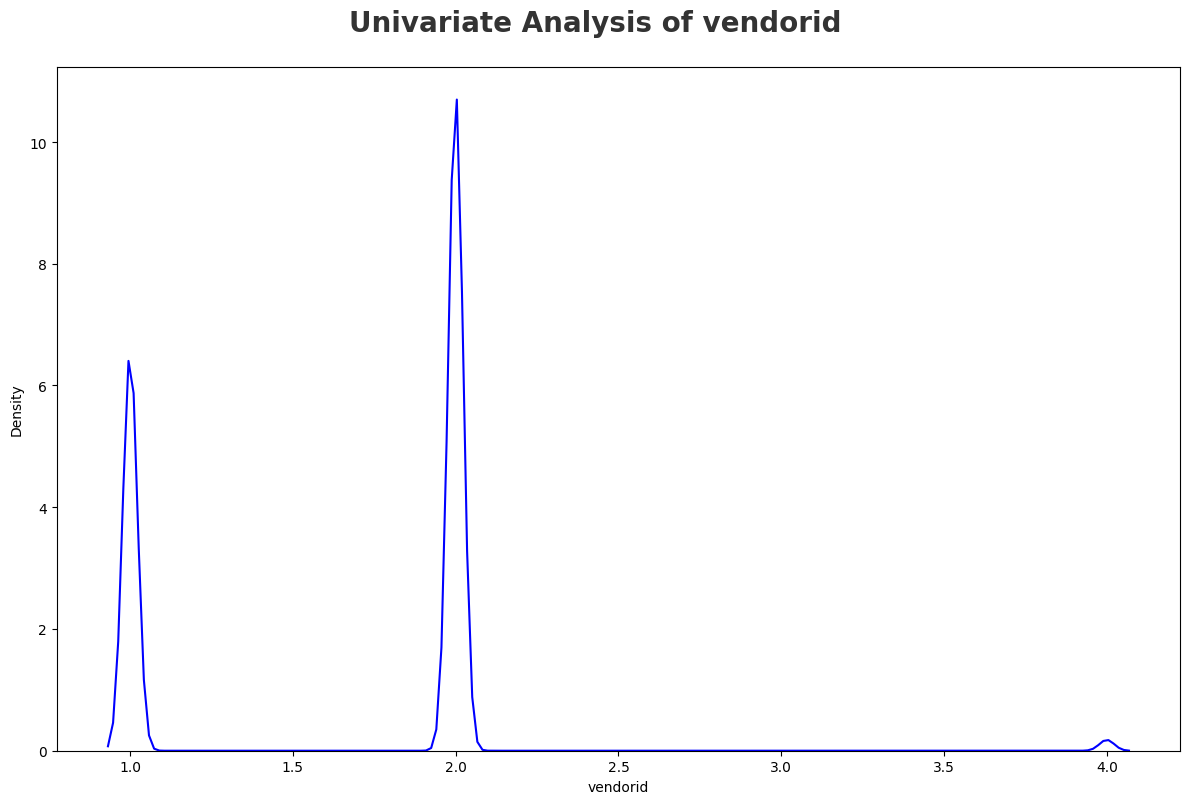

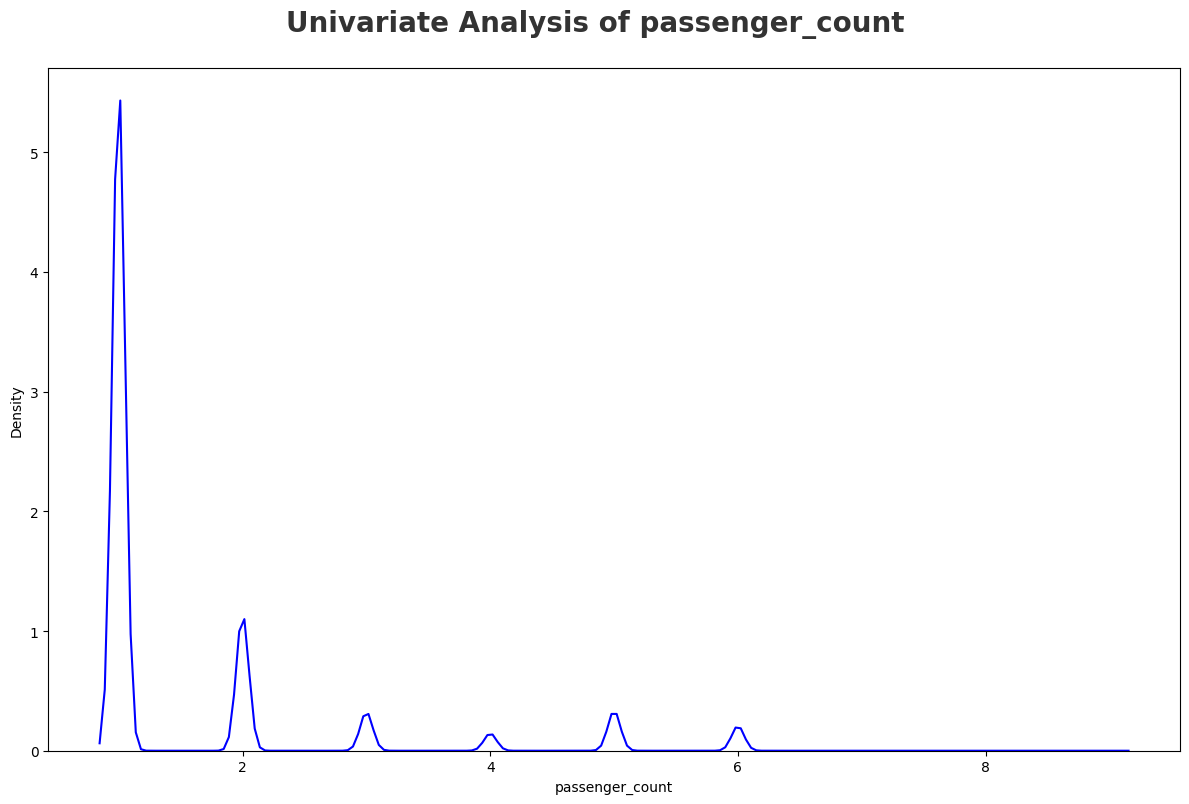

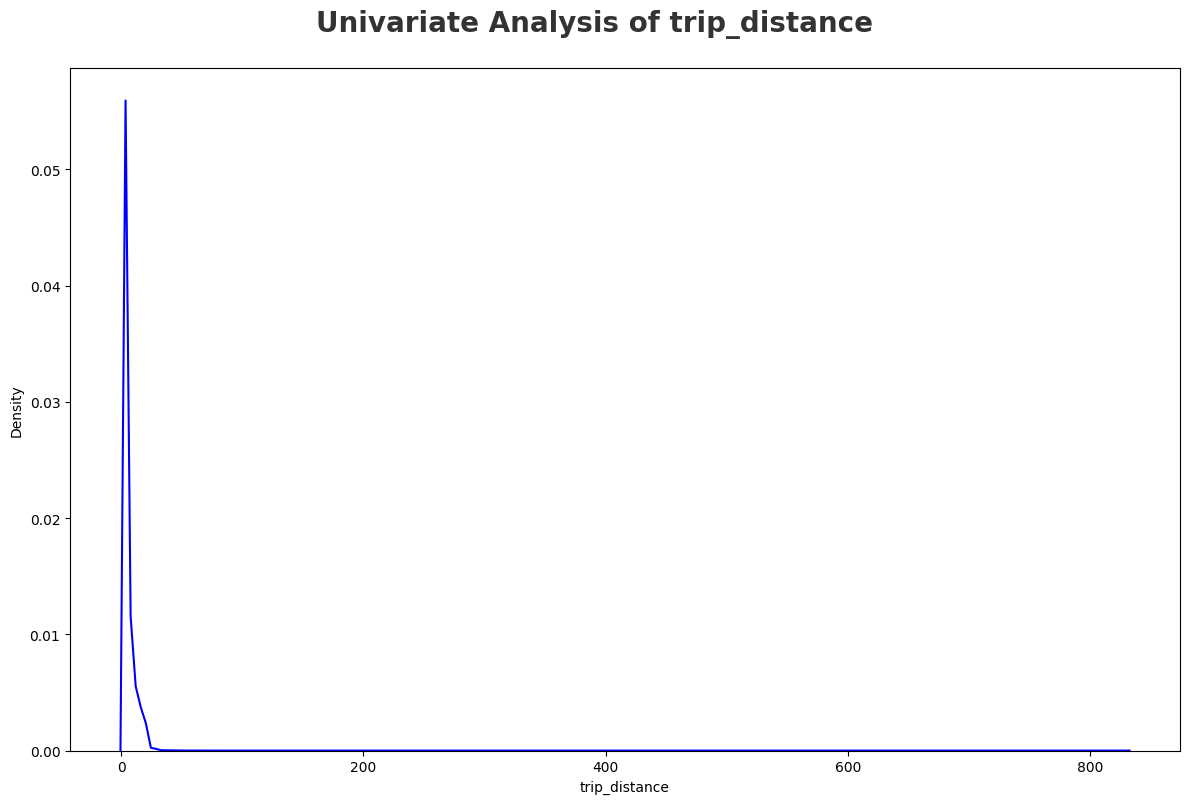

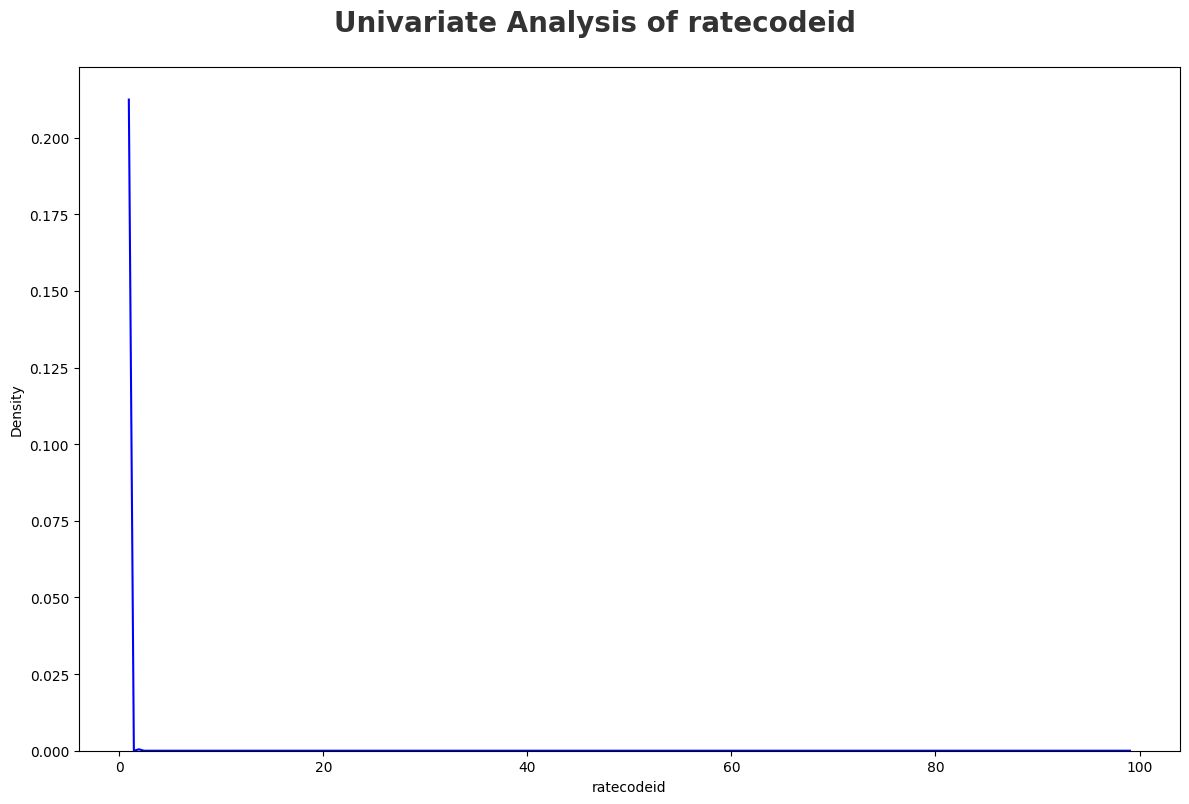

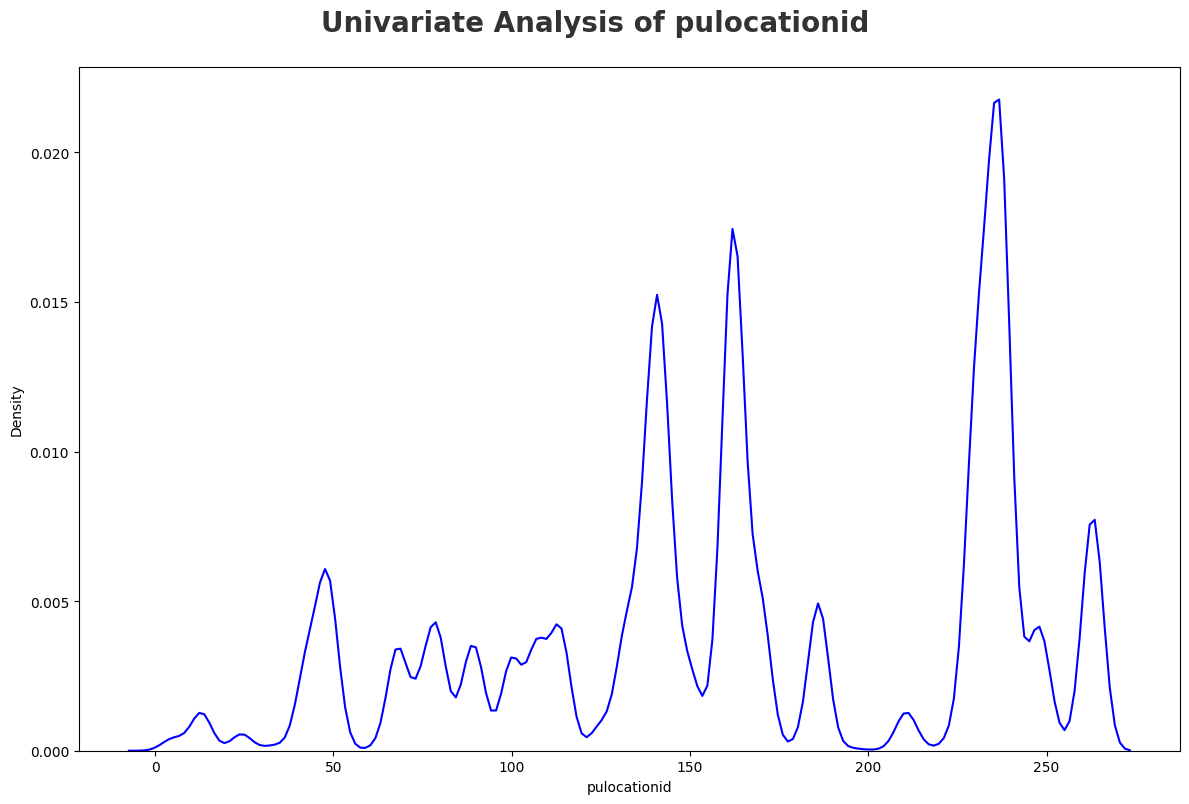

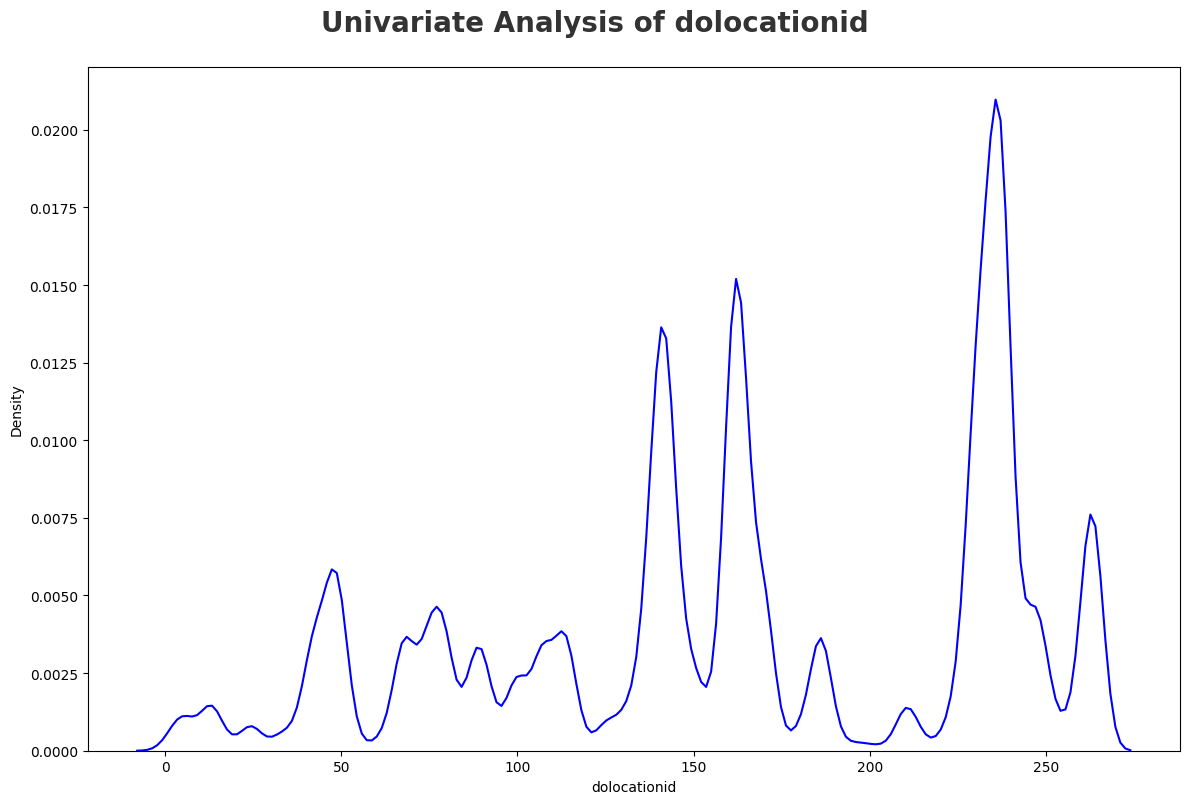

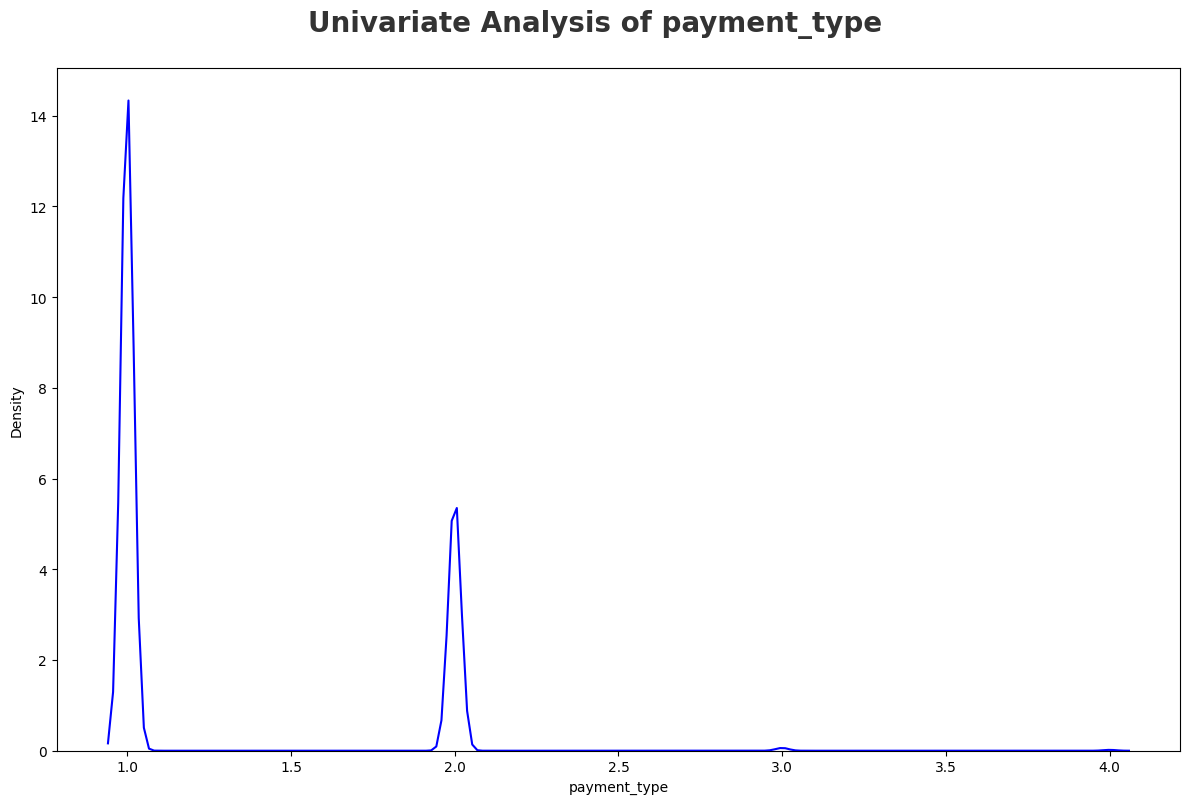

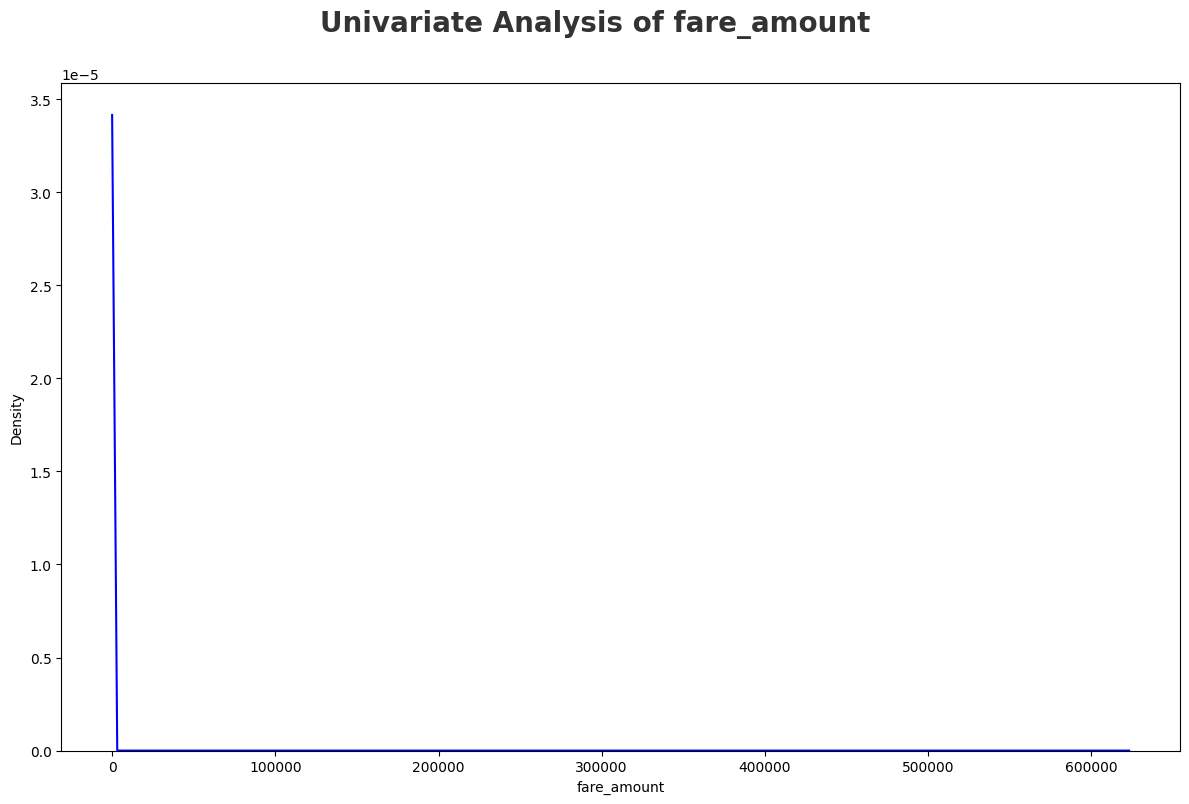

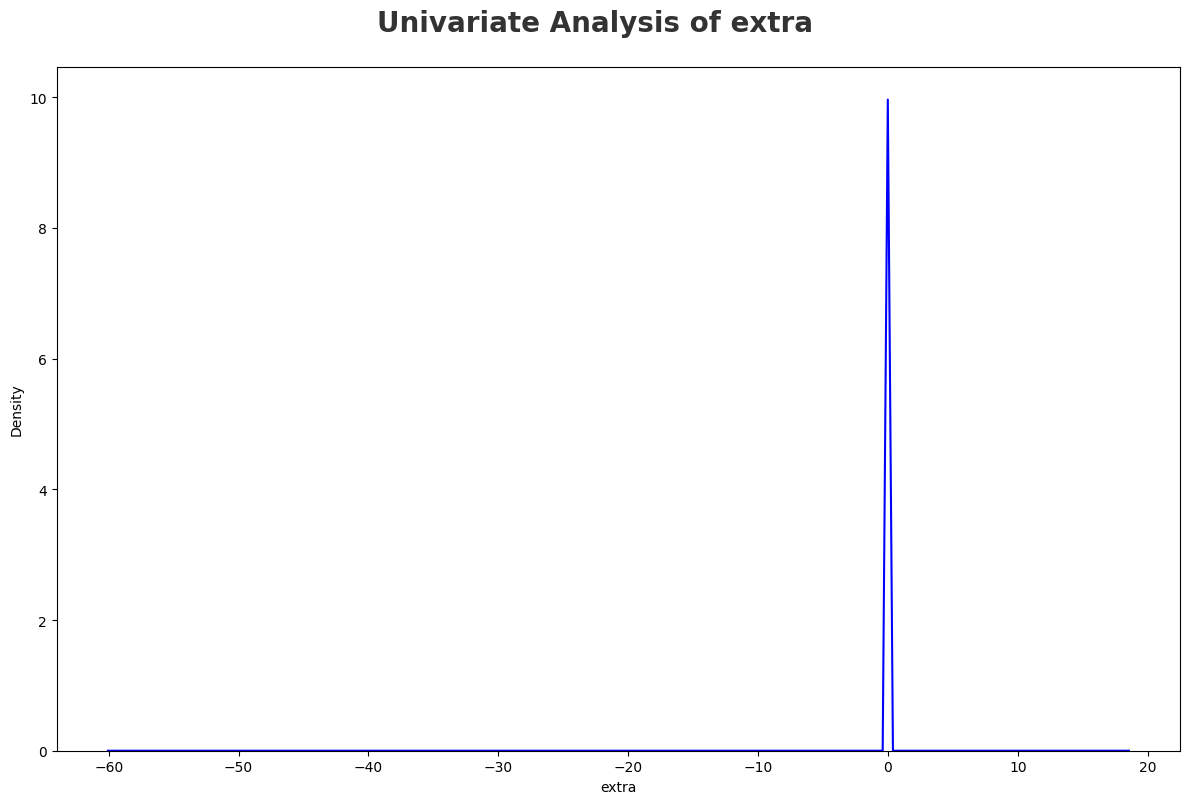

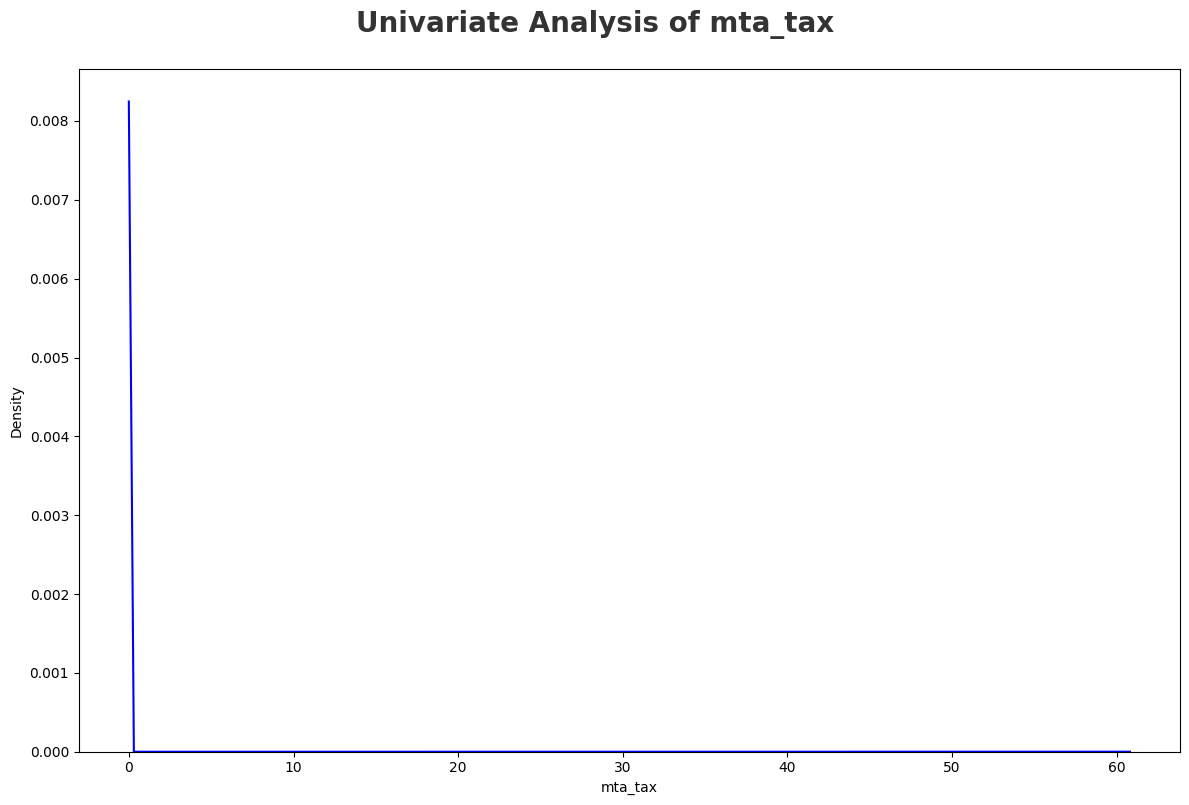

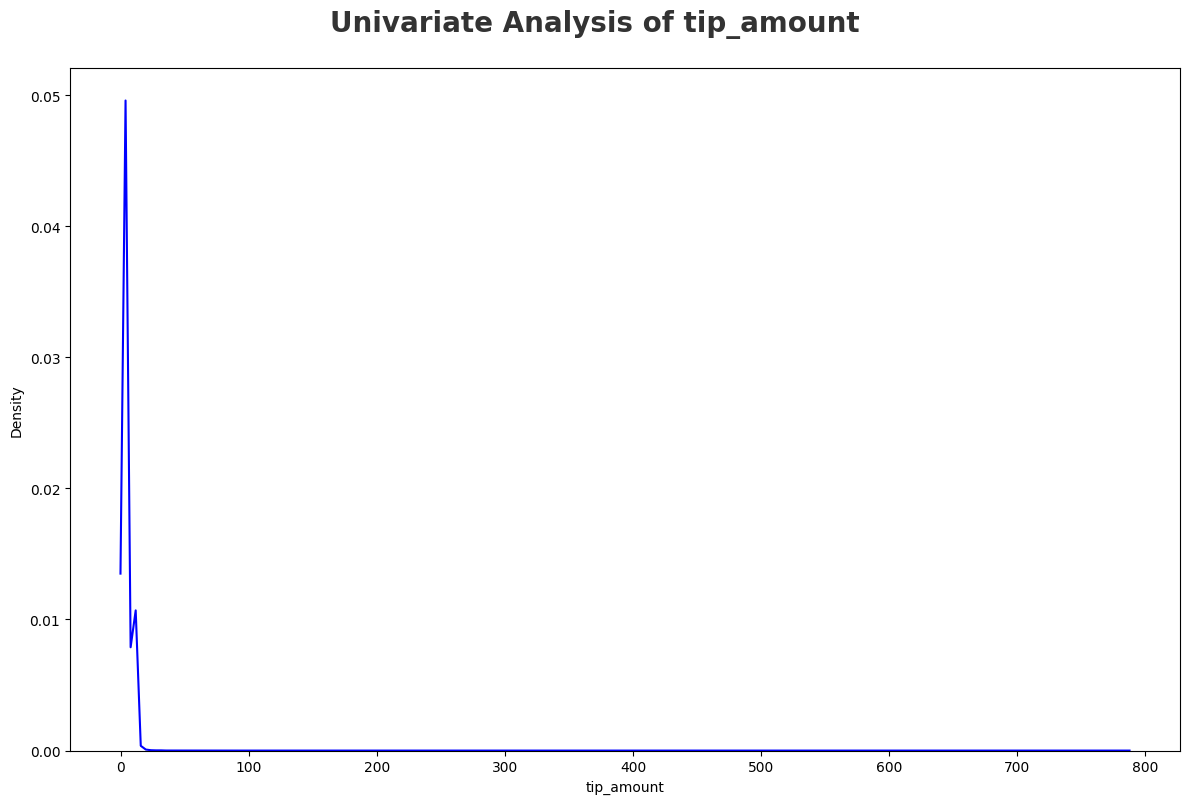

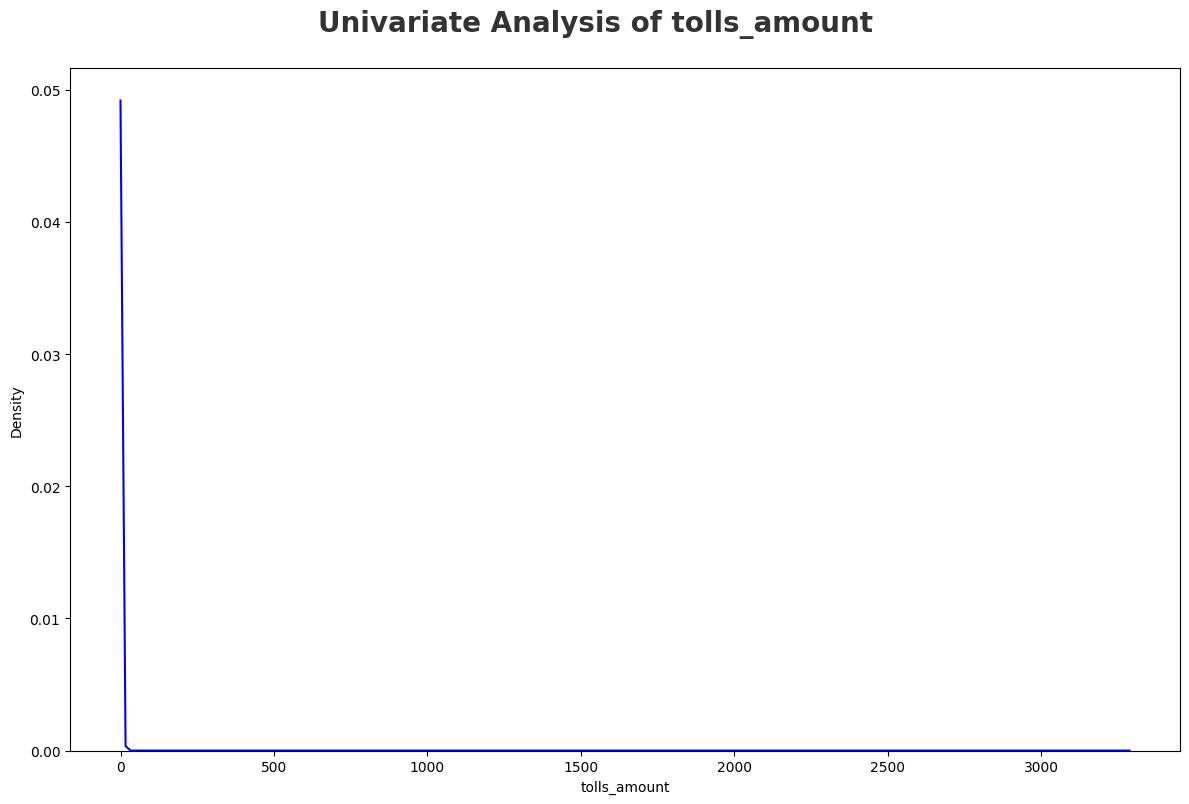

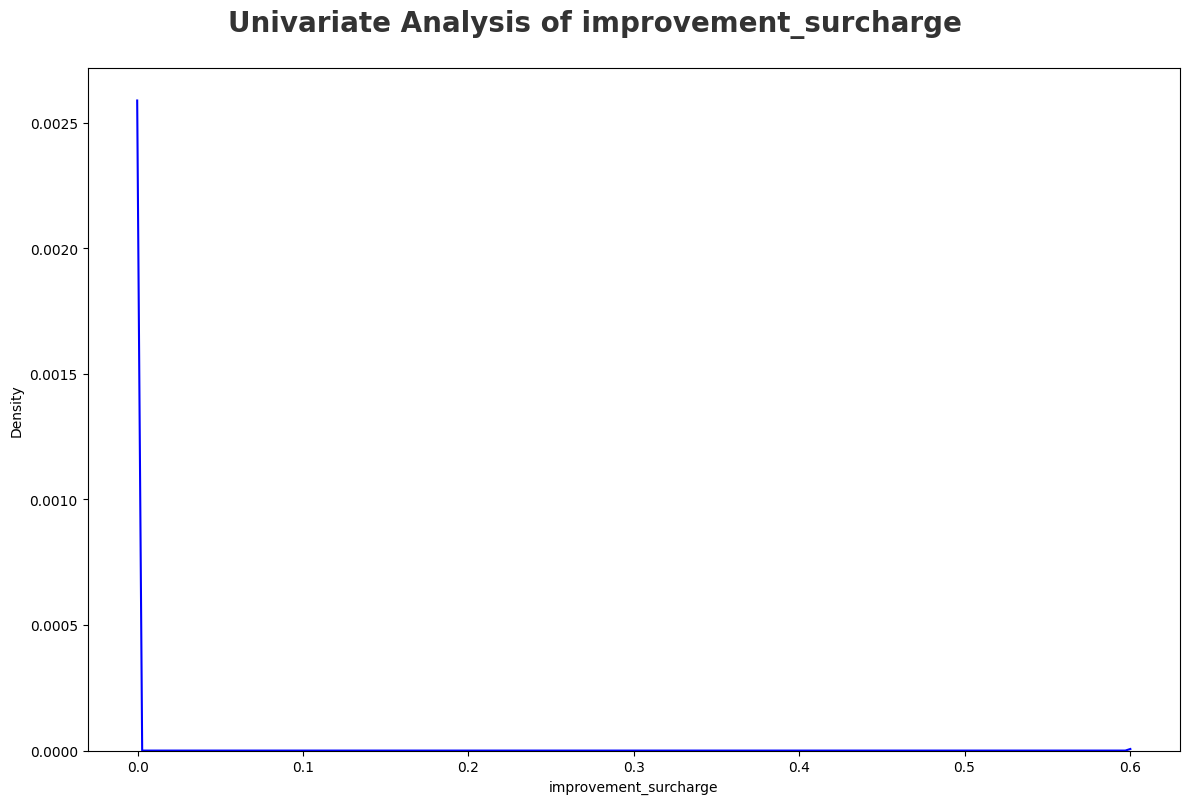

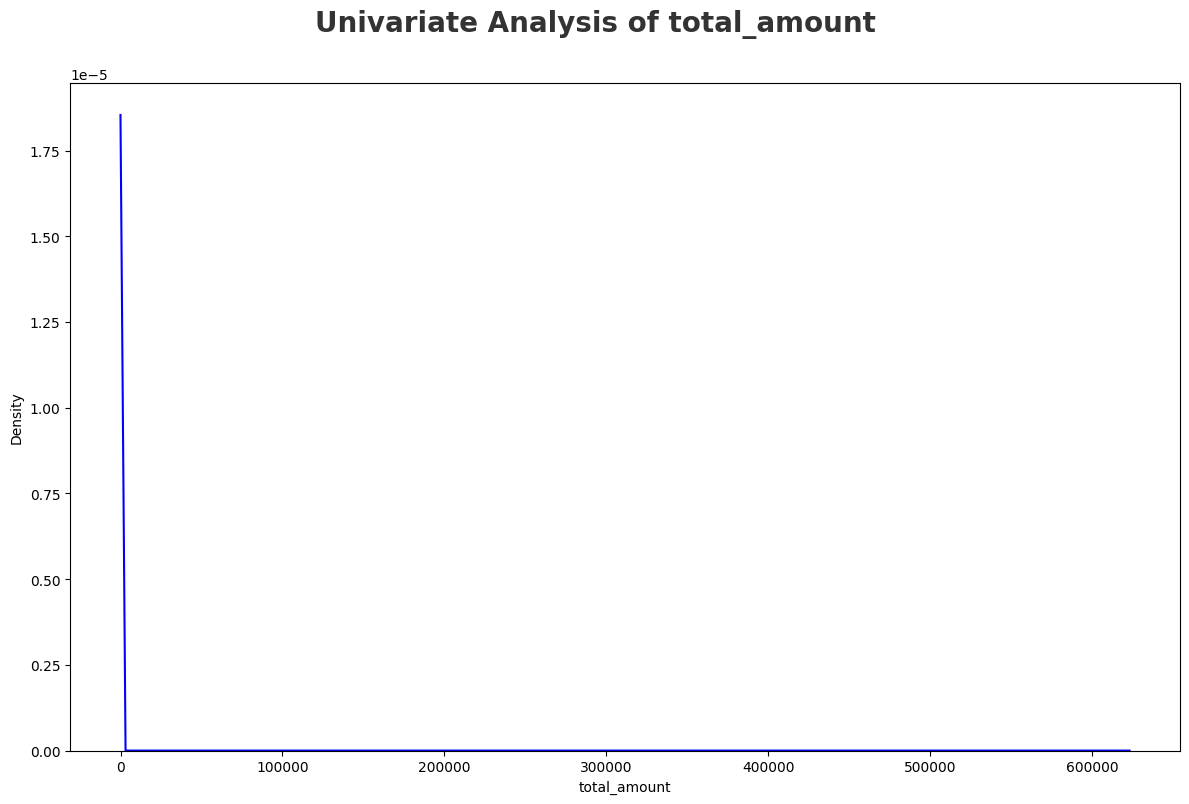

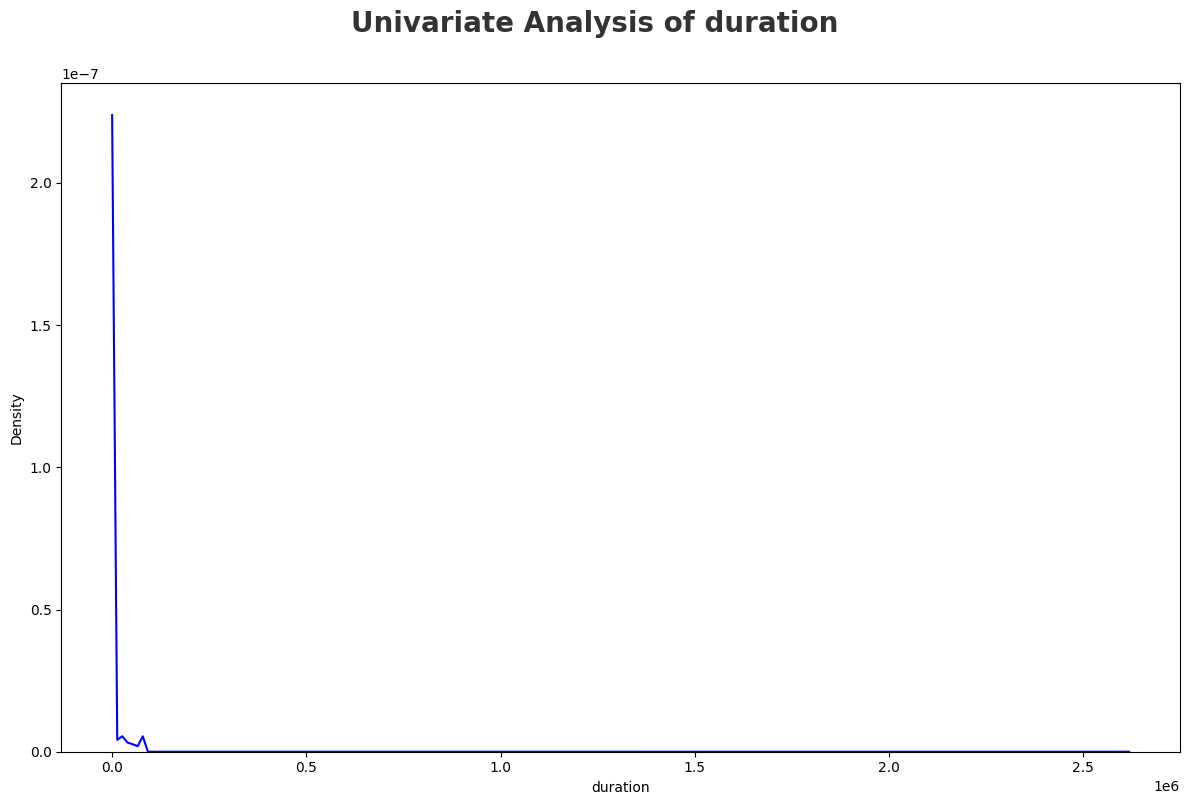

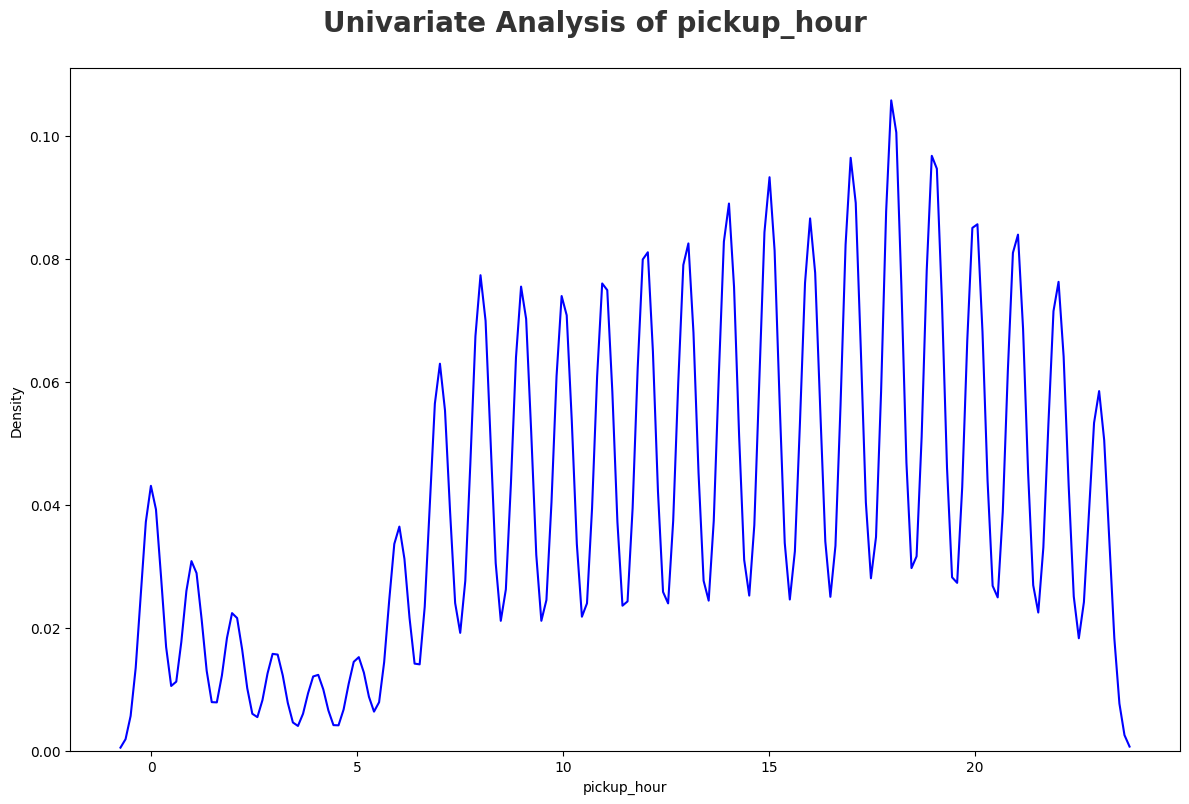

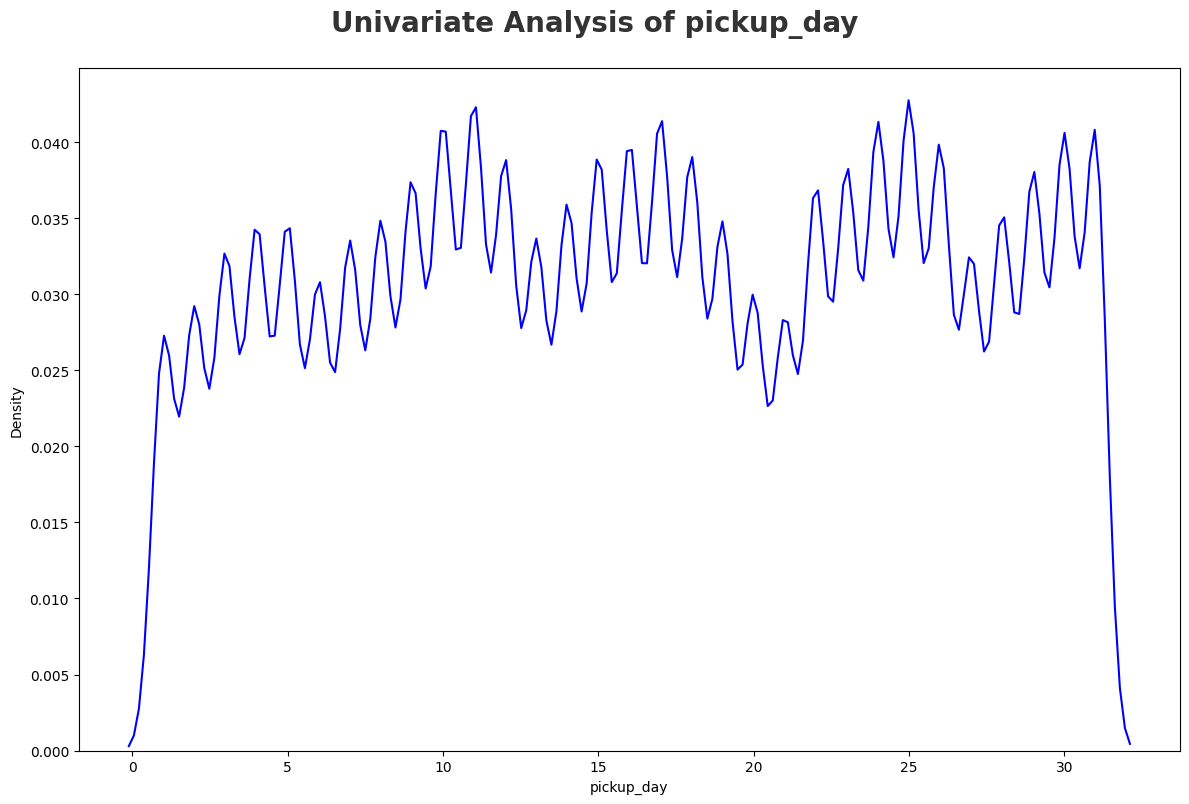

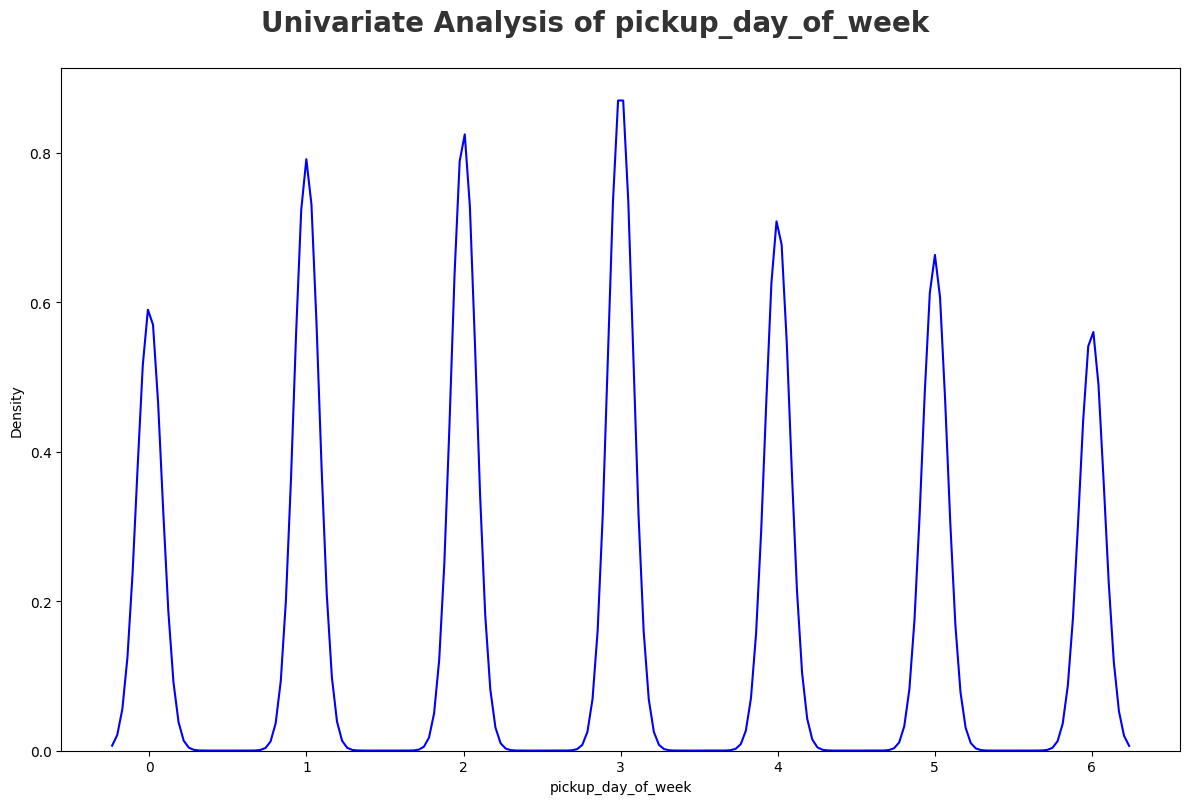

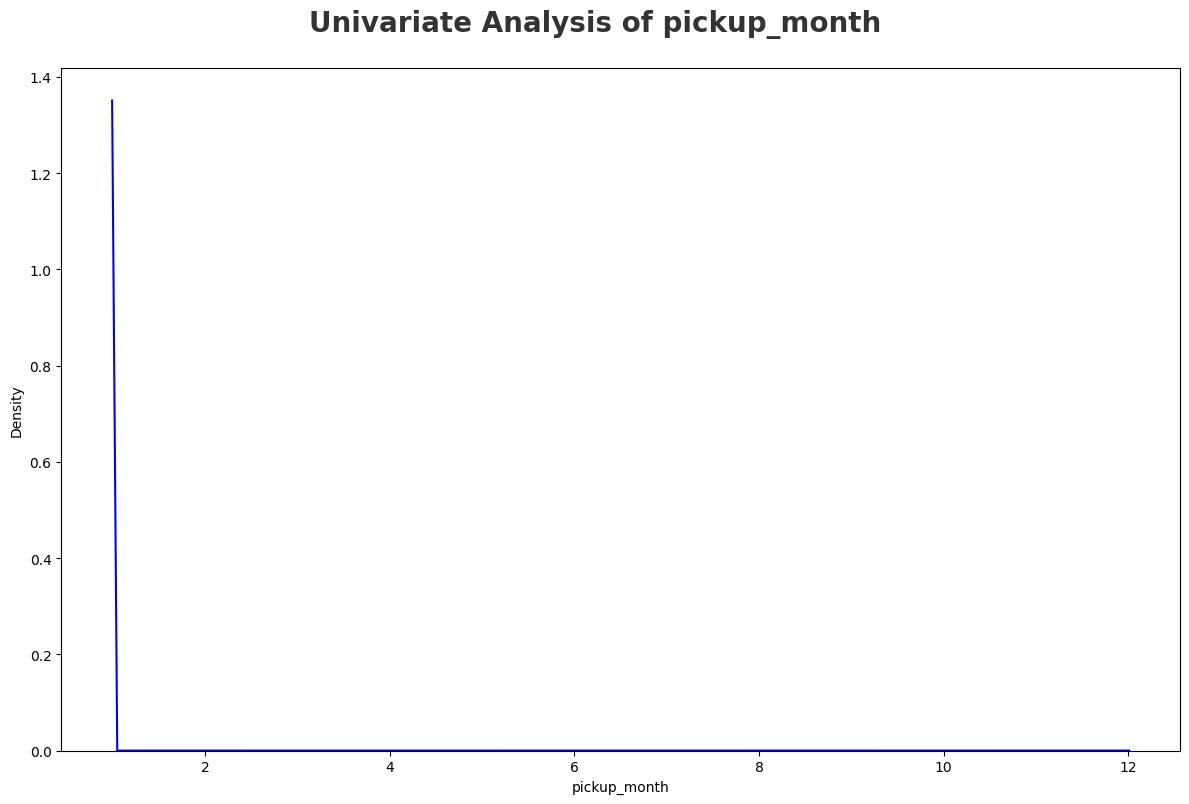

In [19]:
# plt.figure(figsize=(15, 10))
# plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Univariate Analysis of {numeric_features[i]}', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
    # plt.subplot(7, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [20]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 9 discrete features : ['vendorid', 'passenger_count', 'ratecodeid', 'payment_type', 'mta_tax', 'improvement_surcharge', 'pickup_hour', 'pickup_day_of_week', 'pickup_month']

We have 10 continuous_features : ['trip_distance', 'pulocationid', 'dolocationid', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'duration', 'pickup_day']


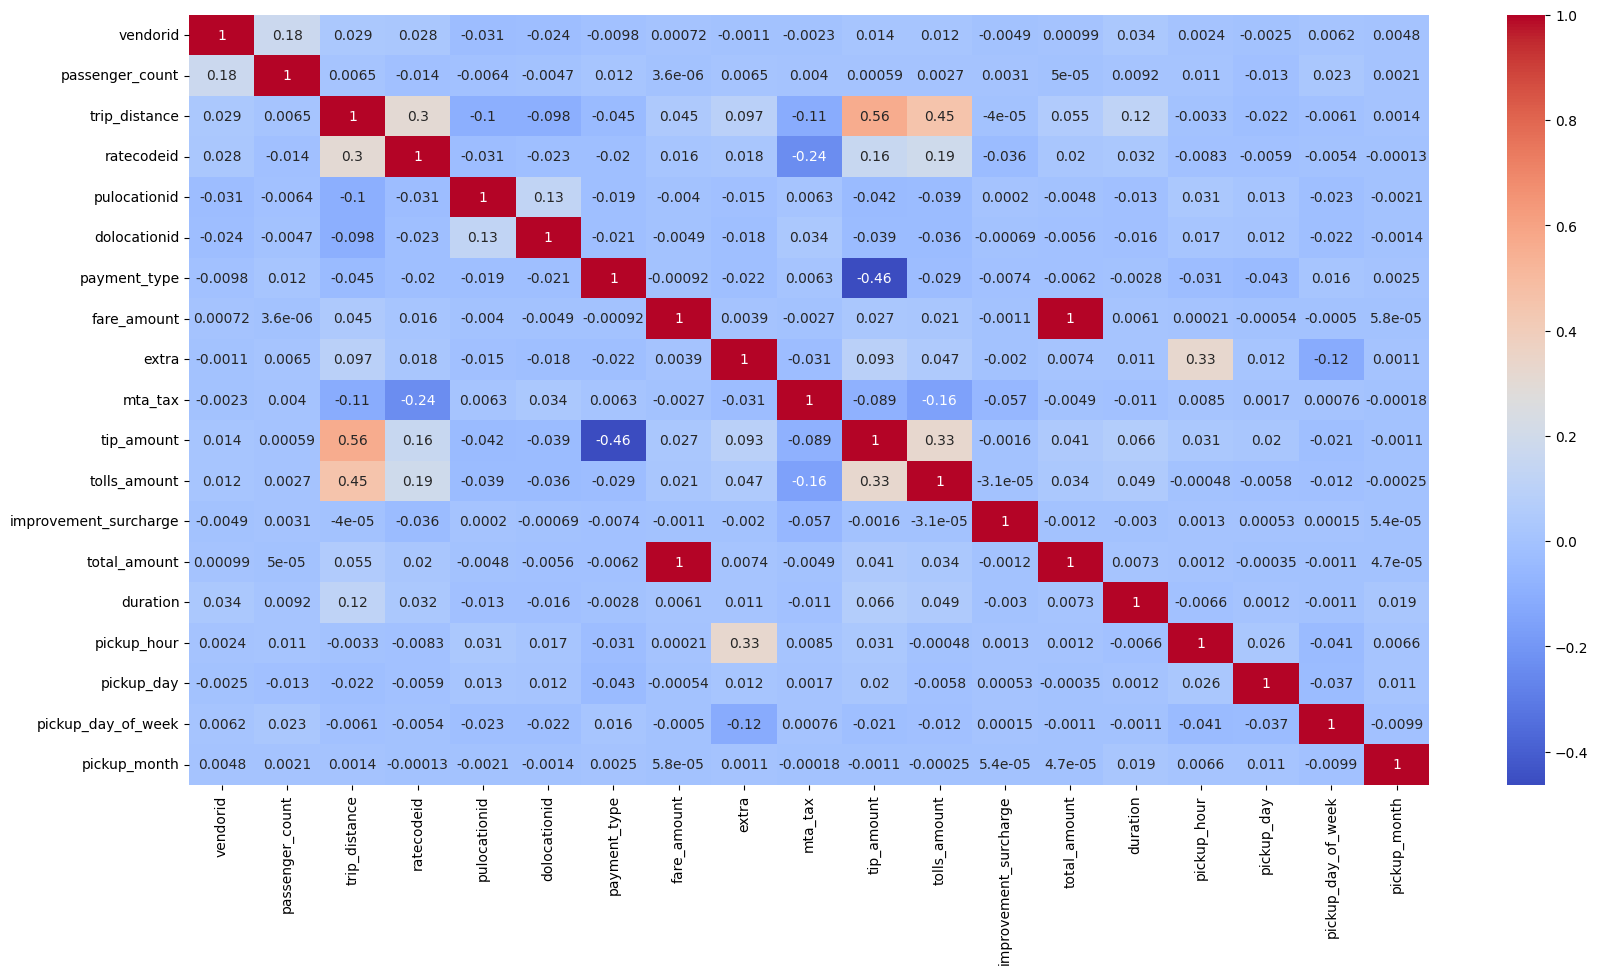

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df[numeric_features].corr(), annot= True, cmap= 'coolwarm', ax= ax)
plt.show()

In [22]:
df = df.drop('fare_amount', axis= 1)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline





In [24]:
X = df.drop('total_amount', axis= 1)
y = df['total_amount']

In [25]:
X.skew(axis=0, skipna=True)

vendorid                   0.378024
passenger_count            2.328550
trip_distance              5.716193
ratecodeid               106.129893
pulocationid              -0.293269
dolocationid              -0.346291
payment_type               1.170785
extra                      3.286256
mta_tax                  614.328196
tip_amount                12.174059
tolls_amount             615.935637
improvement_surcharge   -134.332502
duration                  62.892710
pickup_hour               -0.468556
pickup_day                -0.026024
pickup_day_of_week         0.088432
pickup_month             140.518565
dtype: float64

In [26]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df.shape

(7490539, 18)

In [27]:
numeric_features.remove('fare_amount')
for column in numeric_features:
    df = remove_outliers_iqr(df, column)
df.shape

(5685104, 18)

In [28]:
X = df.drop('total_amount', axis= 1)
y = df['total_amount']

In [29]:
X.skew(axis=0, skipna=True)

vendorid                -0.348723
passenger_count          1.991070
trip_distance            1.283790
ratecodeid               0.000000
pulocationid            -0.354775
dolocationid            -0.373840
payment_type             1.010244
extra                    0.725174
mta_tax                  0.000000
tip_amount               0.418900
tolls_amount             0.000000
improvement_surcharge    0.000000
duration                 0.661573
pickup_hour             -0.470429
pickup_day              -0.022292
pickup_day_of_week       0.081366
pickup_month             0.000000
dtype: float64

In [30]:
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['passenger_count', 'trip_distance', 'payment_type']
X_copy = pt.fit_transform(X[transform_features])

In [31]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)
X_copy.skew(axis=0, skipna=True)

passenger_count    1.427908
trip_distance      0.036485
payment_type       0.932256
dtype: float64

In [39]:
transform_columns= ['passenger_count', 'trip_distance', 'payment_type']
numeric_features = [feature for feature in X.columns if X[feature].dtype != 'O']

from sklearn.preprocessing import StandardScaler,PowerTransformer 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("Transformer", transform_pipe, transform_features),
        ("StandardScaler", numeric_transformer, numeric_features)
    ]
)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=69)
X_train.shape, X_test.shape

((4548083, 17), (1137021, 17))

In [41]:
X_train.columns


Index(['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid',
       'pulocationid', 'dolocationid', 'payment_type', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'duration',
       'pickup_hour', 'pickup_day', 'pickup_day_of_week', 'pickup_month'],
      dtype='object')

In [42]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [44]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

In [45]:
sgd = SGDRegressor(max_iter=1000, alpha=0.0001)
sgd.fit(X_train, y_train)

SGDRegressor()

In [47]:
y_pred = sgd.predict(X_test)
# root_mean_squared_error(y_true=y_test, y_pred=y_pred)
r2_score(y_true=y_test, y_pred=y_pred)

0.9926559470962726

In [53]:
#Performing Incremental Learning

sgg = SGDRegressor()

for i in range(1000):
    x = X_train[i].reshape(1,-1)
    y_true = y_train.iloc[i]

    sgg.partial_fit(x, [y_true])

    y_pred = sgg.predict(X_test)

    r2 = r2_score(y_test,y_pred)
    print(f"Iteration {i+1} - R2 score: {r2:.4f}")
    print("=================================================")

Iteration 1 - R2 score: -7.3078
Iteration 2 - R2 score: -7.3726
Iteration 3 - R2 score: -7.0821
Iteration 4 - R2 score: -6.9465
Iteration 5 - R2 score: -6.3770
Iteration 6 - R2 score: -6.2610
Iteration 7 - R2 score: -6.2949
Iteration 8 - R2 score: -6.3019
Iteration 9 - R2 score: -6.2729
Iteration 10 - R2 score: -6.2598
Iteration 11 - R2 score: -6.2771
Iteration 12 - R2 score: -6.2375
Iteration 13 - R2 score: -6.1371
Iteration 14 - R2 score: -6.0948
Iteration 15 - R2 score: -6.0978
Iteration 16 - R2 score: -5.9258
Iteration 17 - R2 score: -5.8949
Iteration 18 - R2 score: -5.8492
Iteration 19 - R2 score: -5.6229
Iteration 20 - R2 score: -5.3761
Iteration 21 - R2 score: -5.3247
Iteration 22 - R2 score: -5.3002
Iteration 23 - R2 score: -5.3184
Iteration 24 - R2 score: -5.1929
Iteration 25 - R2 score: -5.1616
Iteration 26 - R2 score: -5.1466
Iteration 27 - R2 score: -5.1103
Iteration 28 - R2 score: -5.0759
Iteration 29 - R2 score: -4.8968
Iteration 30 - R2 score: -4.8336
Iteration 31 - R2 s

In [54]:
inc = SGDRegressor()
inc.partial_fit(X_train, y_train)
y_pred = inc.predict(X_test)
r2_score(y_test, y_pred)

0.9926502406750951